# Chapter 1 - Linear Regression Basics

The goal of this code is to study and analize a file containing the historical data of the evolution of the number of Transistors (on CPUs) per year.

The Input file contains the data we need, and the columns we will be looking at (initially) are the "Transistors Count" and the "Year"

In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_axis = [] # Year
y_axis = [] # Transistors Count

# Some numbers show up as 1,170,000,000 (commas)
# Some numbers have references in square brackets after them
for row in open('Input/moore_law.csv'):
    csv_row = row.split('\t')
    
    # Replacing ',' and handling brackets after the numbers
    tmp_x = int(csv_row[2].replace(',','').split('[')[0].strip())
    tmp_y = int(csv_row[1].replace(',','').split('[')[0].strip())
    
    x_axis.append(tmp_x)
    y_axis.append(tmp_y) 

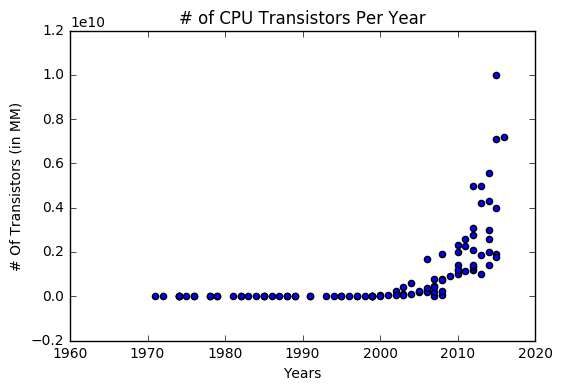

In [6]:
# Casting arrays to Numpy Arrays
x_axis = np.array(x_axis)
y_axis = np.array(y_axis)

plt.scatter(x_axis, y_axis)
plt.ylabel('# Of Transistors (in MM)')
plt.xlabel('Years')
plt.title('# of CPU Transistors Per Year')
plt.show()

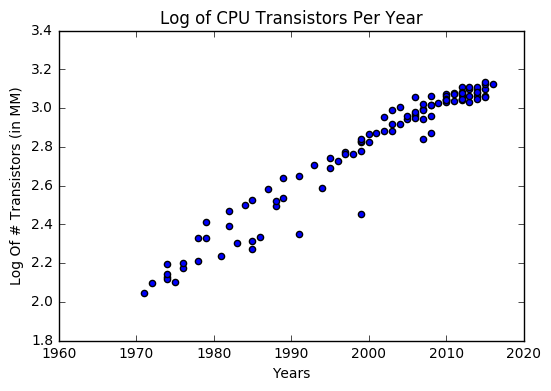

In [8]:
# Calculating the Log of every element of the Transistors array
y_axis = np.log(y_axis)

plt.scatter(x_axis, y_axis)
plt.ylabel('Log Of # Transistors (in MM)')
plt.xlabel('Years')
plt.title('Log of CPU Transistors Per Year')
plt.show()

# Crafting the "Error Function" (and some other Math Notes)

## A Line and it's coordinates:

A "Line" can be defined in Math as : y = ax + b

Each coordinate of the line can be represented as: yi = axi + b (Where 'i' is the index of that coordinate)

## Error Function 

We can define a "Prediction Line" as the set of "predicted" values of "Y" for each "X" we input.

Aditionally, we can define an "Error Function" as something that calculates the overall error of our prediction, given the actual vales of "Y" within our dataset. 

Tipically, an error function for a linear regression looks like this:  

### Sum_Squared_Error =  (y1 - ax1 + b)^2  + (y2 - ax2 + b)^2 + ... + (yn + axn + b)^2

In Short:

### Sum_Squared_Error = ∑ (yi - axi +b)^2     

(Where yi = the value of "y" for any given "x" and "axi + b" = the PREDICTION of "y" for any given "x")

## Line of Best Fit:

In Summary, what we are trying to do is find the "Line of Best Fit", which would be the values "A" and "B" of a line that MINIMIZES THE SUM OF THE SQUARED ERRORS between each of our points and their predictions.

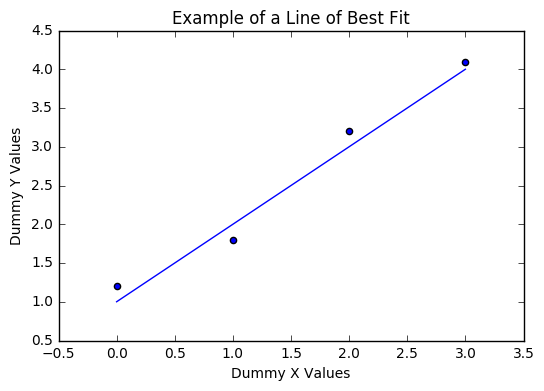

In [14]:
# To exemplify, here's a set of points, and a line between them.
dummy_coordinates = [1.2, 1.8, 3.2, 4.1]

plt.scatter([0,1,2,3], dummy_coordinates)
plt.plot([1,2,3,4])
plt.ylabel('Dummy Y Values')
plt.xlabel('Dummy X Values')
plt.title('Example of a Line of Best Fit')
plt.show()

In [15]:
# Applying the Equations of Error to Calculate the Predictions
# DISCLAIMER: The Math Below is a DERIVATIVE of the moore's law summation, which minimizes the function

denominator = x_axis.dot(x_axis) - x_axis.mean() * x_axis.sum()
a = ( x_axis.dot(y_axis) - y_axis.mean()* x_axis.sum() ) / denominator
b = ( y_axis.mean() * x_axis.dot(x_axis) - x_axis.mean() * x_axis.dot(y_axis) ) / denominator

# let's calculate the predicted Y
y_prediction = a*x_axis + b

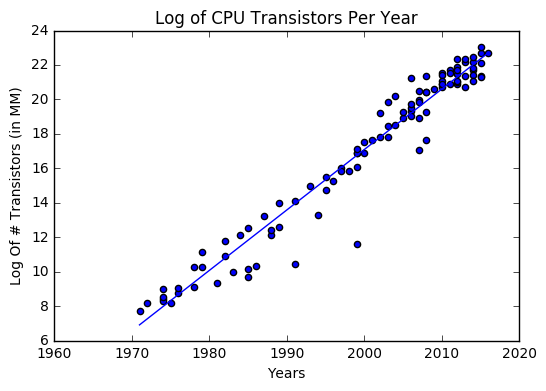

In [46]:
# Plotting both the actual values and the predictions we had for each "x"
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_prediction)
plt.ylabel('Log Of # Transistors (in MM)')
plt.xlabel('Years')
plt.title('Log of CPU Transistors Per Year')
plt.show()

# Checking the Prediction Accuracy (The 'R-Square Model')

In order for us to be able to tell 'how good' our model really is, we can use the 'R-Square' formula to calculate our accuracy.

It goes as follows:

#### R-Square = 1 - ( Sum_Squared_Error / Sum_Squared_Total)

#### Sum_Squared_Error = The Result Sum of Our Error Function

#### Sum_Squared_Total = ∑ (yi - mean(y) ) ^2

## Accuracy Index - Perfect Model

A PERFECT MODEL, by definition means a model with no error, in our case, that would mean having the Sum_Squared_Error equal ZERO. Following up with that, it's then safe to assume that a perfect model is one that has the R-Square value of ONE.


#### Proof: 
R-Square = 1 - ( Sum_Squared_Error / Sum_Squared_Total)

R-Square = 1 - (0 / Sum_Squared_Total)

R-Square = 1 - 0 = 1

## Accuracy Index - Average Model

Another possible outcome is to have the R-Square index having value of ZERO, in that case, it would mean that our model predicted the AVERAGE (it is not that good). For that to happen, our Sum_Squared_Error must have the same value as the Sum_Squared_Total (which is the average difference).

#### Proof:
R-Square = 1 - ( Sum_Squared_Error / Sum_Squared_Total)

R-Square = 1 - (X / X) = 1 - 1 = 0


## Accuracy Index - Bad Model

The Last possible outcome is having the R-Square index result in a NEGATIVE VALUE. When would that happen ? In order for that to happen, we would need to have a Sum_Squared_Error greater than the Sum_Squared_Total, which would result in ( Sum_Squared_Error / Sum_Squared_Total) assuming a value that's greater than 1.


#### Proof:

R-Square = 1 - ( Sum_Squared_Error / Sum_Squared_Total)

Assuming: Sum_Squared_Error > Sum_Squared_Total we have: ( Sum_Squared_Error / Sum_Squared_Total) > 1 (Let's call it 'Z')

Hence: R-Square = 1 - Z (Where Z > 1) => R-Square < 0 


In [29]:
# Now we can calculate in code, the R-Square value of our model, to determine how good it is 
# Let's start with manually calculating the R-Square value of our "Dummy Model" (used to exemplify the Line of Best Fit)
# To exemplify, here's a set of points, and a line between them.

y_coordinates = np.array([1.2, 1.8, 3.2, 4.1])
p_coordinates = np.array([1,2,3,4]) # Predictions

In [31]:
# Formula: R-Square = 1 - ( Sum_Squared_Error / Sum_Squared_Total)
# Calculating Manually first, then, using NumPy
Sum_Squared_Error = 0
for idx in range(0,4):
    Sum_Squared_Error += ((y_coordinates[idx] - p_coordinates[idx])**2)
    
Sum_Squared_Total = 0
y_mean = np.array(y_coordinates).mean()
for idx in range(0,4):
    Sum_Squared_Total += ((y_coordinates[idx] - y_mean)**2)

R_Square = 1 - (Sum_Squared_Error / Sum_Squared_Total)

print 'Sum_Squared_Error: %f,\nSum_Squared_Total: %f, \nR-Square: %f' % (Sum_Squared_Error, Sum_Squared_Total, R_Square)

Sum_Squared_Error: 0.130000,
Sum_Squared_Total: 5.207500, 
R-Square: 0.975036


In [34]:
# Calculating the values using NumPy Arrays now (Which is Way Easier)
Sum_Squared_Error = y_coordinates - p_coordinates
Sum_Squared_Total = y_coordinates - y_coordinates.mean()
R_Square = 1 - Sum_Squared_Error.dot(Sum_Squared_Error) / Sum_Squared_Total.dot(Sum_Squared_Total)

print 'R-Square: %f' % (R_Square)

R-Square: 0.975036


In [35]:
# Finally, we can now apply the same math to the actual Moore's Law Model we developed
denominator = x_axis.dot(x_axis) - x_axis.mean() * x_axis.sum()
a = ( x_axis.dot(y_axis) - y_axis.mean()* x_axis.sum() ) / denominator
b = ( y_axis.mean() * x_axis.dot(x_axis) - x_axis.mean() * x_axis.dot(y_axis) ) / denominator

# let's calculate the predicted Y
y_prediction = a*x_axis + b

Sum_Squared_Error = y_axis - y_prediction
Sum_Squared_Total = y_axis - y_axis.mean()
R_Square = 1 - Sum_Squared_Error.dot(Sum_Squared_Error) / Sum_Squared_Total.dot(Sum_Squared_Total)

print 'R-Square: %f' % (R_Square)

R-Square: 0.949444
